<a href="https://colab.research.google.com/github/lesi-nedo/ISPR_assignments/blob/main/Assignment_6_o_nedobiychuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center" ><b> <font face="Rage" size=7 >SIFT Descriptors</font></b></div>

<div align="center" ><b> <font face="Rage" size=5 >Assignment 6</font></b></div>
<div align="center" ><b> <font face="Rage" size=4 >Oleksiy Nedobiychuk</font></b></div>


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded '.format(name=fn, length=len(uploaded[fn])))


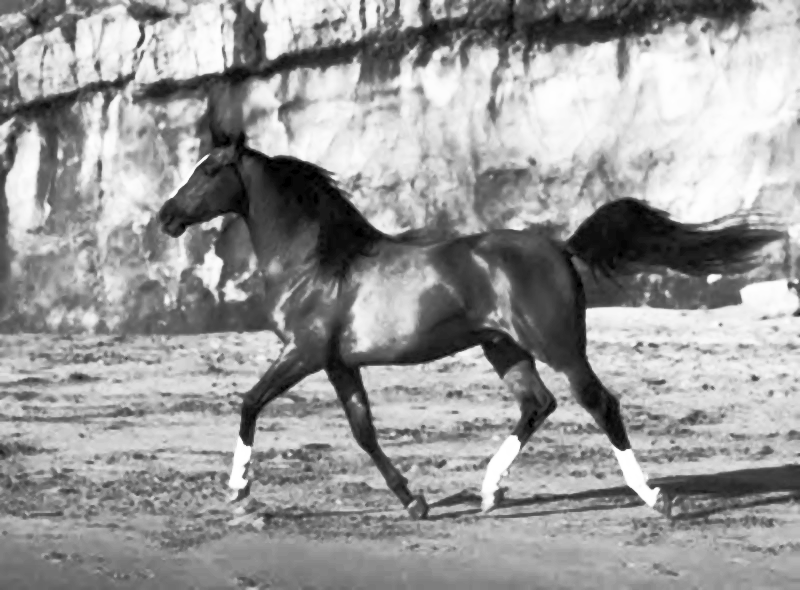

In [82]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import io
all_images_len = len(uploaded)
default_shape = (800,590)
all_images = np.empty([all_images_len, default_shape[1], default_shape[0]], dtype=np.uint8)
gamma = 1.5 # The value for the gamma correction
invGamma = 1.0 / gamma

for ind,fn in enumerate(uploaded.keys()):
  image = cv2.imdecode(np.frombuffer(io.BytesIO(uploaded[fn]).getbuffer(), np.uint8), cv2.IMREAD_GRAYSCALE)
  resized = cv2.resize(image, default_shape, interpolation=cv2.INTER_LANCZOS4) # all images are resized
  eq_img = cv2.equalizeHist(image) # to improve contrast, I've done the histogram equalization
  norm_img = eq_img / 255
  mdb_img = cv2.medianBlur(eq_img, 3)
  table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0,256)]).astype("uint8")
  gcor_img = cv2.LUT(mdb_img, table)
  all_images[ind] = gcor_img
  cv2_imshow(gcor_img)
  break

# print(all_images[0])
